In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import dual_annealing
from scipy.optimize import least_squares

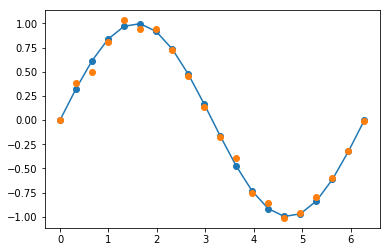

In [2]:
# How well does simulated annealing fit the spring constant for a simple harmonic oscillator?
# Adapted from material from March 24, 2019.

# Simplest possible test case..
# We know that for k=1, a single spring satisfies the equation
# y'' = -y
# which solves to sin(t) given an initial condition [0, 1]
# so why don't we use the curve y(t) = sin(t) as our 'data - to - fit' curve?

# will we also have to fit the initial condition?
# this gives us three parameters to estimate...
# Well, why don't we say that the initial condition can be fit pretty well
# because of our lab measurement.

T = np.linspace(0, np.pi * 2, 20) # number of datapoints is N
Y = np.sin(T)

absolute_noise_limit = 0.05

percent_noise = 0.05
relative_noise_limit = percent_noise * Y 

# remember: multiplying by noise changes the stddev.
noise = np.random.randn(Y.shape[0]) * absolute_noise_limit

noisy_data = Y + np.hstack(([0], noise[1:]))

plt.plot(T, Y, 'o-')
plt.plot(T, noisy_data, 'o')


In [3]:
'''
# Sample code from the doc on least_squares.

y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([1.0, 1.0, 0.0])

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

'''

k_guess = 1.17
IC = [k_guess]



def solve_harmonic_oscillator(params, T, Y):
    k = params[0]
    F = lambda t, x: [x[1], 
                  - k * x[0]]
    IC = Y[0], 1. # pretend we also have an exact velocity reading
    soln = solve_ivp(F, [T[0], T[-1]], IC,
                t_eval=T)
    
    return soln.y[0,:] - Y

In [4]:
%%time

res_lsq = least_squares(solve_harmonic_oscillator, IC, args=(T, noisy_data))

k_found = res_lsq.x

print(k_found)
print(f'N function evals: {res_lsq.nfev}')

[0.98969933]
N function evals: 5
CPU times: user 26.5 ms, sys: 0 ns, total: 26.5 ms
Wall time: 31 ms


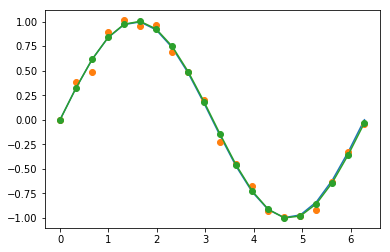

In [5]:
F = lambda t, x: [x[1], 
                  - k_found * x[0]]

IC = [0., 1.]
soln = solve_ivp(F, [T[0], T[-1]], IC,
            t_eval=T)

plt.plot(T, Y, '-')
plt.plot(T, noisy_data, 'o')
plt.plot(soln.t, soln.y[0,:],'o-') # hey, this is a great fit!

In [3]:
# same as above, but normed last line.

def solve_harmonic_oscillator(params):
    global T
    Y = noisy_data
    
    k = params[0]
    F = lambda t, x: [x[1], 
                  - k * x[0]]
    IC = Y[0], 1. # pretend we also have an exact velocity reading
    soln = solve_ivp(F, [T[0], T[-1]], IC,
                t_eval=T)
    
    return np.sum((soln.y[0,:] - Y) ** 2)

In [4]:
%%time

ret = dual_annealing(solve_harmonic_oscillator, list(zip([0], [3])),
                    maxiter=5)

print(ret.nfev)

# weird... for this question, dual annealing seems to actually do very well for even a low number of iterations.

print(ret)


23
     fun: 0.0415816025097477
 message: ['Maximum number of iteration reached']
    nfev: 23
    nhev: 0
     nit: 5
    njev: 0
       x: array([1.00172629])
CPU times: user 62.8 ms, sys: 0 ns, total: 62.8 ms
Wall time: 82.1 ms


In [ ]:
'''
Okay, probably time to move onto
the next part of this project.

Adam's concern: how much worse do least squares and DA do
when I collect multiple periods of data?

--> make a copy of this notebook, and modify the period and run the results.

First notebook saved here as template for simplest case.
'''